# 简单线性回归
## 第一步：数据预处理

这里导入我们需要的库，值得注意的是，这里比第一天多了一个matplotlib.pyploy:matplotlib是python上的一个2D绘图库,
matplotlib下的模块pyplott是一个有命令样式的函数集合，
matplotlib.pyploy是为我们对结果进行图像化作准备的。

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

导入相关数据

In [5]:
dataset = pd.read_csv('../datasets/studentscores.csv')
print(dataset)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


这里我们需要使用pandas的iloc(区分于loc根据index来索引，iloc利用行号来索引)方法来对数据进行处理，第一个参数为行号，:表示全部行，第二个参数 ：1表示截到第1列(也就是取第0列)

In [6]:
X = dataset.iloc[ : ,   : 1 ].values
Y = dataset.iloc[ : , 1 ].values
print("X")
print(X)
print("Y")
print(Y)

X
[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
Y
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


导入sklearn库的cross_validation类来对数据进行训练集、测试集划分

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/4, random_state = 0) 
print("X_train")
print(X_train)
print("X_test")
print(X_test)
print("Y_train")
print(Y_train)
print("Y_test")
print(Y_test)

X_train
[[7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
X_test
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]
Y_train
[86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]
Y_test
[20 27 69 30 62 35 24]


# 第二步：训练集使用简单线性回归模型来训练
从sklearn的线性模型类中调用线性回归模型

In [8]:
from sklearn.linear_model import LinearRegression

创建一个线性回归对象regressor,并对训练集利用fit()方法进行训练

In [9]:
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


## 第三步：预测结果
利用predict()方法对测试集进行预测

In [10]:
Y_pred = regressor.predict(X_test)
print(Y_pred)
print(regressor.coef_)

[16.84472176 33.74557494 75.50062397 26.7864001  60.58810646 39.71058194
 20.8213931 ]
[9.94167834]


In [13]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_log_error,mean_squared_error,median_absolute_error,r2_score
a=explained_variance_score(Y_test, Y_pred) #解释方差得分  最好的得分是 1.0, 值越低越差.
b=mean_absolute_error(Y_test, Y_pred)#绝对平均误差¶
c=mean_squared_error(Y_test, Y_pred)#均方误差
d=mean_squared_log_error(Y_test, Y_pred)#均方误差对数
e=median_absolute_error(Y_test, Y_pred)#中位绝对误差
f=r2_score(Y_test, Y_pred)#R² score, 可决系数  最佳分数为 1.0, 可以为负数（因为模型可能会更糟）. 总是预测 y 的预期值，不考虑输入特征的常数模型将得到 R^2 得分为 0.0.
print(a)
print(b)
print(c)
print(d)
print(e)
print(f)

0.9398737229250632
4.130879918502482
20.33292367497996
0.01815560535541627
3.2135998981281055
0.9367661043365056


# 可视化
训练集结果可视化
首先调用scatter方法，对训练集作散点图

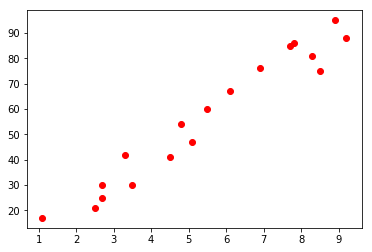

In [46]:
plt.scatter(X_train , Y_train, color = 'red')
plt.show()

测试集结果可视化

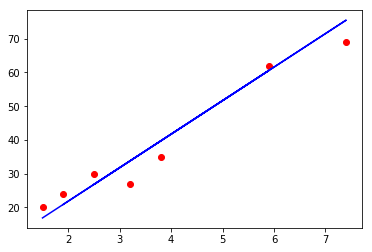

In [31]:
plt.scatter(X_test , Y_test, color = 'red')
plt.plot(X_test , regressor.predict(X_test), color ='blue')
plt.show()